<a href="https://colab.research.google.com/github/ebamberg/research-projects-ml/blob/main/Image_Processing/examples_analyse_image_using_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ollama langchain_community --quiet

modelid="llama3.2-vision"

get_ipython().system_raw("curl -fsSL https://ollama.com/install.sh | sh")
get_ipython().system_raw("ollama serve &")
get_ipython().system_raw(f"ollama pull {modelid}")
get_ipython().system_raw(f"ollama pull {modelid}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [2]:
!wget -O receipe.jpg https://templates.mediamodifier.com/6452232a36ed2f480dcbf8c3/short-receipt-template-with-barcode.jpg

--2025-03-14 14:52:56--  https://templates.mediamodifier.com/6452232a36ed2f480dcbf8c3/short-receipt-template-with-barcode.jpg
Resolving templates.mediamodifier.com (templates.mediamodifier.com)... 104.26.14.126, 172.67.75.110, 104.26.15.126, ...
Connecting to templates.mediamodifier.com (templates.mediamodifier.com)|104.26.14.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84402 (82K) [application/octet-stream]
Saving to: ‘receipe.jpg’

receipe.jpg         100%[===================>]  82.42K  --.-KB/s    in 0.08s   

2025-03-14 14:52:57 (979 KB/s) - ‘receipe.jpg’ saved [84402/84402]



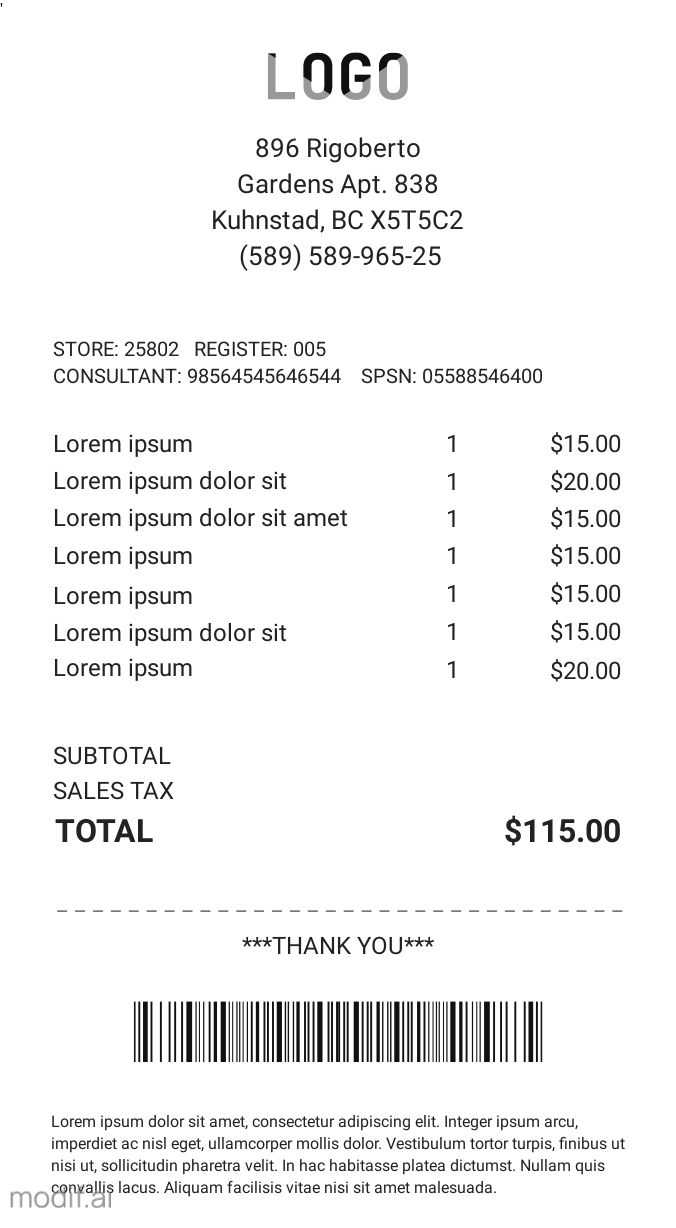

In [4]:
from PIL import Image
import io
import base64

image=Image.open("receipe.jpg")
buffered = io.BytesIO()
image.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')

image

In [8]:
import ollama

description =ollama.chat(
    model=modelid,
    messages=[{
      'role': 'user',
      'content': 'describe the content of this image.',
      'images':[img_str]
    }
    ],

)

description

ChatResponse(model='llama3.2-vision', created_at='2025-03-14T15:23:23.478081319Z', done=True, done_reason='stop', total_duration=47614180144, load_duration=30614001504, prompt_eval_count=19, prompt_eval_duration=7163000000, eval_count=211, eval_duration=9373000000, message=Message(role='assistant', content='The image displays a receipt for an online purchase, with the following details:\n\n* **Store Information**\n\t+ Store name: 896 Rigoberto\n\t+ Address: Gardens Apt. 838, Kuhnstad, BC X5T5C2 (589) 589-965-25\n* **Consultant Information**\n\t+ Consultant number: 98564545646544\n* **Purchase Details**\n\t+ Number of items purchased: 6\n\t+ Price per item: $15.00\n\t+ Total cost: $90.00\n* **Tax and Subtotal**\n\t+ Sales tax: $15.00\n\t+ Subtotal: $105.00\n* **Payment Method**\n\t+ Payment method: Not specified\n* **Receipt Number**\n\t+ Receipt number: Not specified\n\nThe total amount due is $120.00, which includes the subtotal of $105.00 and sales tax of $15.00. The receipt does not

--2025-03-14 15:30:28--  https://i.pinimg.com/originals/e6/d0/8c/e6d08cf1fc6540e21b0bb1385ab28a62.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84242 (82K) [image/jpeg]
Saving to: ‘boxes.jpg’

boxes.jpg           100%[===================>]  82.27K  --.-KB/s    in 0.01s   

2025-03-14 15:30:28 (6.76 MB/s) - ‘boxes.jpg’ saved [84242/84242]



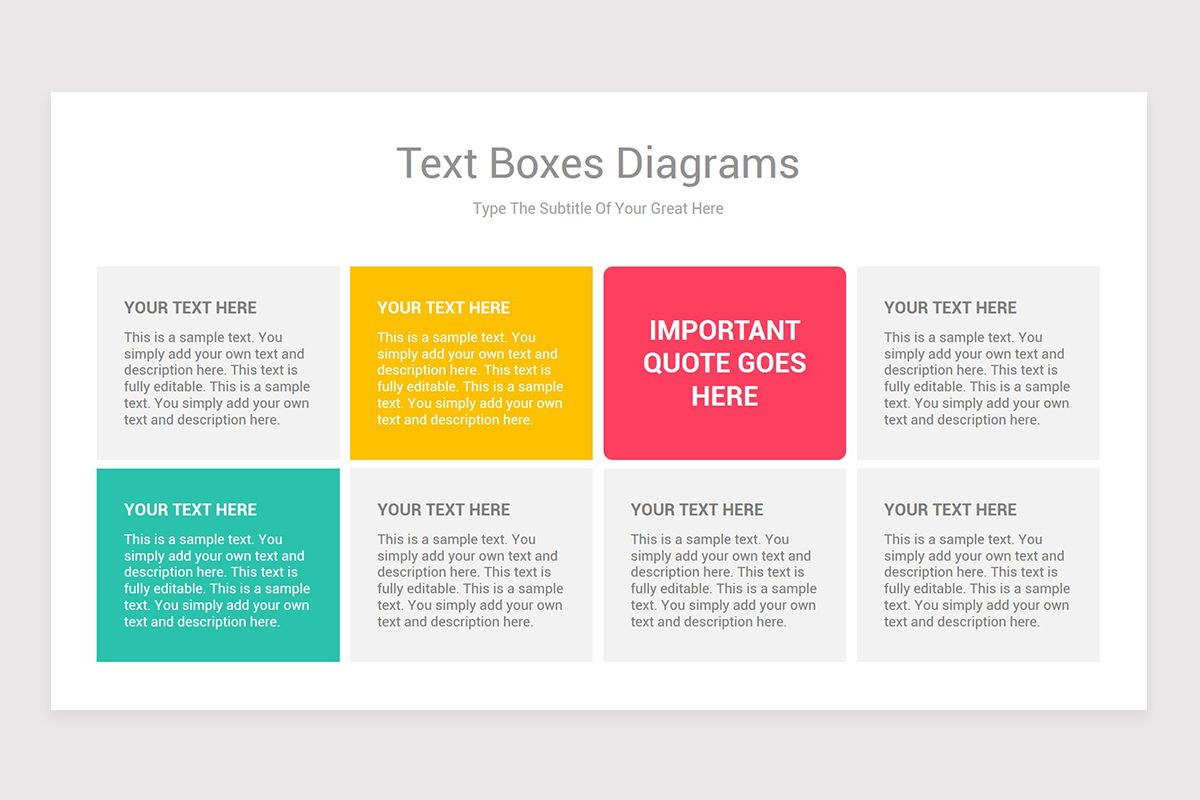

In [9]:
!wget -O boxes.jpg https://i.pinimg.com/originals/e6/d0/8c/e6d08cf1fc6540e21b0bb1385ab28a62.jpg

from PIL import Image
import io
import base64

image2=Image.open("boxes.jpg")
buffered2 = io.BytesIO()
image2.save(buffered2, format="JPEG")
img_str2 = base64.b64encode(buffered2.getvalue()).decode('utf-8')

image2

In [15]:
import ollama

description2 =ollama.chat(
    model=modelid,
    messages=[{
      'role': 'user',
      'content': 'count the number of textboxes in the provided image. Response only with the number and noadditional text.',
      'images':[img_str2]
    }
    ],
    options = {
      'temperature': 0
  }

)

description2

ChatResponse(model='llama3.2-vision', created_at='2025-03-14T15:37:07.468368463Z', done=True, done_reason='stop', total_duration=623097725, load_duration=26115015, prompt_eval_count=33, prompt_eval_duration=68000000, eval_count=2, eval_duration=71000000, message=Message(role='assistant', content='7', images=None, tool_calls=None))

--2025-03-14 15:44:33--  https://d2908q01vomqb2.cloudfront.net/fc074d501302eb2b93e2554793fcaf50b3bf7291/2022/06/28/Figure-1.-Current-high-level-solution-architecture-for-the-ALLFINANZ-solution-1024x793.png
Resolving d2908q01vomqb2.cloudfront.net (d2908q01vomqb2.cloudfront.net)... 18.65.11.73, 18.65.11.182, 18.65.11.181, ...
Connecting to d2908q01vomqb2.cloudfront.net (d2908q01vomqb2.cloudfront.net)|18.65.11.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221404 (216K) [image/png]
Saving to: ‘aws.png’

aws.png             100%[===================>] 216.21K  --.-KB/s    in 0.02s   

2025-03-14 15:44:34 (10.5 MB/s) - ‘aws.png’ saved [221404/221404]



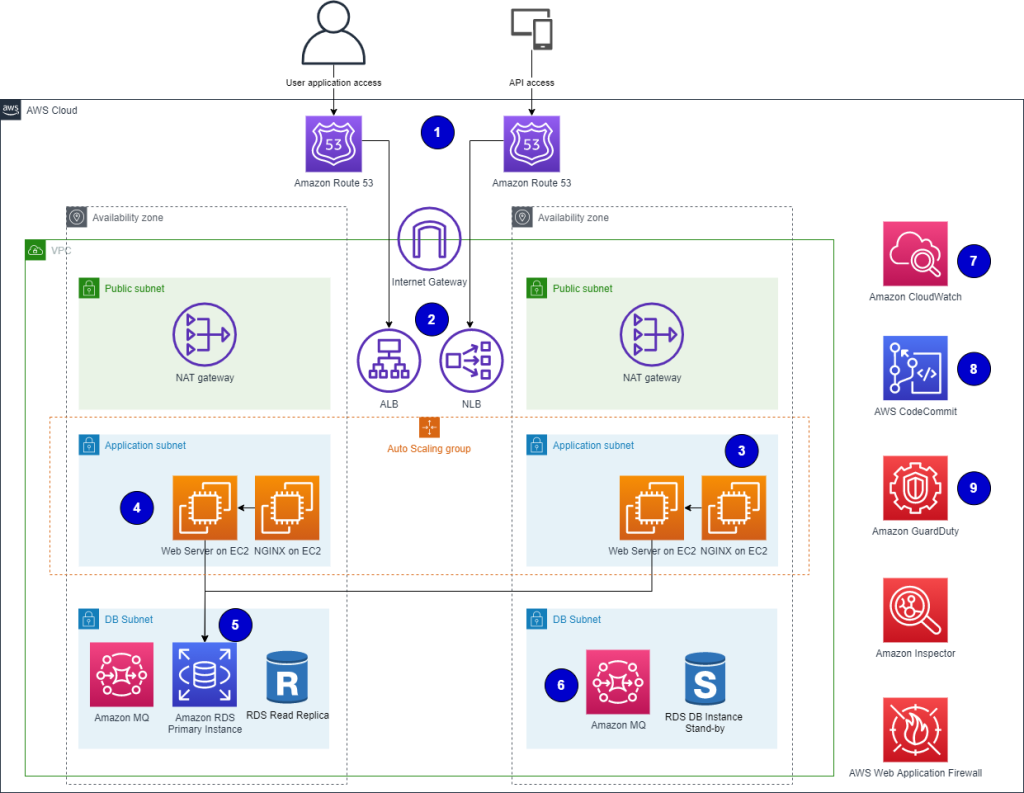

In [18]:
!wget -O aws.png https://d2908q01vomqb2.cloudfront.net/fc074d501302eb2b93e2554793fcaf50b3bf7291/2022/06/28/Figure-1.-Current-high-level-solution-architecture-for-the-ALLFINANZ-solution-1024x793.png

from PIL import Image
import io
import base64

awsimg=Image.open("aws.png")
buffered3 = io.BytesIO()
awsimg.save(buffered3, format="PNG")
aws_based64 = base64.b64encode(buffered3.getvalue()).decode('utf-8')

awsimg

In [19]:
import ollama

description3 =ollama.chat(
    model=modelid,
    messages=[{
      'role': 'user',
      'content': 'count the number of Public Subnets in the image provided. Response only with the number and noadditional text.',
      'images':[aws_based64]
    }
    ],
    options = {
      'temperature': 0
  }

)

description3['message'].content

'2'

In [23]:
description3 =ollama.chat(
    model=modelid,
    messages=[{
      'role': 'user',
      'content': 'Generate a list of all aws components in the provided aws infratstructure diagram.\n\n Output the name, number of instances and a brief description of the components as a csv table.\n\n Ensure the output is a valid csv table with the columns "count","name" and "description". Output only the csv table and no addiitonal text.',
      'images':[aws_based64]
    }
    ],
    options = {
      'temperature': 0
  }

)

description3['message'].content

'"count","name","description"\n\n1,"Amazon CloudWatch", "Monitoring service for AWS resources."\n\n2, "AWS CodeCommit", "Version control system for source code."\n\n3, "Amazon GuardDuty", "Security service that detects potential threats."\n\n4, "Amazon Inspector", "Security assessment service for AWS resources."\n\n5, "Amazon MQ", "Message queuing service based on Apache ActiveMQ."\n\n6, "RDS DB Instance Stand-by", "Read-only replica of a primary database instance."\n\n7, "AWS Web Application Firewall", "Firewall service that protects web applications from common attacks."'

In [25]:
import pandas as pd

with open("aws_components.csv", "w") as csv_file:
    csv_file.write(description3['message'].content)

data = pd.read_csv('aws_components.csv')
print(data)

   count                             name  \
0      1                Amazon CloudWatch   
1      2                 "AWS CodeCommit"   
2      3               "Amazon GuardDuty"   
3      4               "Amazon Inspector"   
4      5                      "Amazon MQ"   
5      6       "RDS DB Instance Stand-by"   
6      7   "AWS Web Application Firewall"   

                                         description  
0            "Monitoring service for AWS resources."  
1          "Version control system for source code."  
2   "Security service that detects potential thre...  
3   "Security assessment service for AWS resources."  
4   "Message queuing service based on Apache Acti...  
5   "Read-only replica of a primary database inst...  
6   "Firewall service that protects web applicati...  
